# Labour Market Trends Analysis
 
The tech industry in Australia is growing at a rapid speed. But there is not enough jobs in Australia to fulfill the requirements of 
the current growth. To improve the tech industry from this situation, the Tech Council of Australia is aiming to create 1 million jobs by 2025

Currently, this is an analysis of current labour market trends to understand the distribution of employment in tech
industry across the states, Capital cities and Regional areas.


### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Reading Dataset

In [2]:
employment_by_industry = pd.read_excel('ER Employment by Industry - November 2021.xlsx')
employment_by_industry.head()

,Employment Region,State/Territory,Industry,Employment by Industry - Total,Employed Full-Time,Employed Part-Time,Employed - Male,Employed - Female,Five year growth by Industry,Employment Distribution (%)
0,Capital Region,NSW/ACT,"Agriculture, Forestry and Fishing",7200,3800,3400,3900,3300,1000,2.1
1,Capital Region,NSW/ACT,Mining,500,500,0,200,300,0,0.1
2,Capital Region,NSW/ACT,Manufacturing,7800,5900,2000,5500,2300,-1100,2.3
3,Capital Region,NSW/ACT,"Electricity, Gas, Water and Waste Services",2300,2000,300,1600,700,-600,0.7
4,Capital Region,NSW/ACT,Construction,28000,23700,4300,25400,2600,2600,8.3


In [3]:
#Different industries from the employment data
employment_by_industry['Industry'].unique()

array(['Agriculture, Forestry and Fishing', 'Mining', 'Manufacturing',
       'Electricity, Gas, Water and Waste Services', 'Construction',
       'Wholesale Trade', 'Retail Trade',
       'Accommodation and Food Services',
       'Transport, Postal and Warehousing',
       'Information Media and Telecommunications',
       'Financial and Insurance Services',
       'Rental, Hiring and Real Estate Services',
       'Professional, Scientific and Technical Services',
       'Administrative and Support Services',
       'Public Administration and Safety', 'Education and Training',
       'Health Care and Social Assistance',
       'Arts and Recreation Services', 'Other Services'], dtype=object)

##### Currently, we are considering the "Professional, Scientific and Technical Services" industry for our analysis and are reading it to a new data frame

In [4]:
employment_by_industry = employment_by_industry.loc[employment_by_industry['Industry'] == 'Professional, Scientific and Technical Services']

In [5]:
#resetting index
employment_by_industry = employment_by_industry.reset_index(drop = True)

In [6]:
#renaming columns
employment_by_industry.columns = ['Employment Region', 'State/Territory', 'Industry', 'Employment - Total', 'Employed - Full Time',
                                  'Employed - Part Time', 'Employed - Males', 'Employed - Females', 'Five Year Changes', 'Employment Distribution (%)']

In [7]:
employment_by_industry

,Employment Region,State/Territory,Industry,Employment - Total,Employed - Full Time,Employed - Part Time,Employed - Males,Employed - Females,Five Year Changes,Employment Distribution (%)
0,Capital Region,NSW/ACT,"Professional, Scientific and Technical Services",39800,32200,7600,22600,17200,8100,11.7
1,Central West,NSW,"Professional, Scientific and Technical Services",5600,4200,1500,2400,3200,700,4.9
2,Far West Orana,NSW,"Professional, Scientific and Technical Services",0,0,0,0,0,-700,0.0
3,Hunter,NSW,"Professional, Scientific and Technical Services",23700,17100,6600,14000,9700,5000,7.2
4,Illawarra South Coast,NSW,"Professional, Scientific and Technical Services",16500,12500,4000,8000,8500,4500,7.2
5,Mid North Coast,NSW,"Professional, Scientific and Technical Services",5600,2900,2700,3000,2600,-2700,3.9
6,Murray Riverina,NSW,"Professional, Scientific and Technical Services",5700,4500,1200,3000,2700,600,4.1
7,New England and North West,NSW,"Professional, Scientific and Technical Services",2100,1700,300,600,1500,-100,2.4
8,Sydney East Metro,NSW,"Professional, Scientific and Technical Services",165000,132700,32300,86700,78200,29300,16.0
9,Sydney Greater West,NSW,"Professional, Scientific and Technical Services",61000,51600,9400,38800,22200,18700,9.9


#### For analysing the employement in different regions across states, we are splitting the data the industry dataset to 2 new datasets. One is capital cities and the other is regional areas.

In [8]:
#Splitting the above dataframe into two : Capital cities and other regions

capital_city_index = [0,8,9,10,11,17,18,19,21,22,24,34,35,39,40,42,44]
regional_area_index = [1,2,3,4,5,6,7,12,13,14,15,16,20,23,25,26,27,28,29,30,31,32,33,36,37,38,41,43]

capital_city_employment = employment_by_industry.iloc[capital_city_index]
capital_city_employment
regional_area_employment = employment_by_industry.iloc[regional_area_index]

In [9]:
capital_city_employment = capital_city_employment.reset_index(drop = True)
regional_area_employment = regional_area_employment.reset_index(drop = True)

In [10]:
regional_area_employment

,Employment Region,State/Territory,Industry,Employment - Total,Employed - Full Time,Employed - Part Time,Employed - Males,Employed - Females,Five Year Changes,Employment Distribution (%)
0,Central West,NSW,"Professional, Scientific and Technical Services",5600,4200,1500,2400,3200,700,4.9
1,Far West Orana,NSW,"Professional, Scientific and Technical Services",0,0,0,0,0,-700,0.0
2,Hunter,NSW,"Professional, Scientific and Technical Services",23700,17100,6600,14000,9700,5000,7.2
3,Illawarra South Coast,NSW,"Professional, Scientific and Technical Services",16500,12500,4000,8000,8500,4500,7.2
4,Mid North Coast,NSW,"Professional, Scientific and Technical Services",5600,2900,2700,3000,2600,-2700,3.9
5,Murray Riverina,NSW,"Professional, Scientific and Technical Services",5700,4500,1200,3000,2700,600,4.1
6,New England and North West,NSW,"Professional, Scientific and Technical Services",2100,1700,300,600,1500,-100,2.4
7,Ballarat,VIC,"Professional, Scientific and Technical Services",4500,2900,1600,1700,2800,-100,5.5
8,Barwon,VIC,"Professional, Scientific and Technical Services",10500,8400,2000,6000,4500,3600,6.1
9,Bendigo,VIC,"Professional, Scientific and Technical Services",4400,3100,1400,2800,1600,1100,5.2


In [11]:
#grouping the data by state for each regional and capital cities
capital_city_employment1 = capital_city_employment.groupby(['State/Territory']).sum()
regional_area_employment1 = regional_area_employment.groupby(['State/Territory']).sum()

In [12]:
regional_area_employment1

,Employment - Total,Employed - Full Time,Employed - Part Time,Employed - Males,Employed - Females,Five Year Changes,Employment Distribution (%)
State/Territory,,,,,,,
NSW,59200,42900,16300,31000,28200,7300,29.7
QLD,165300,128700,36500,86200,79100,31600,58.7
SA,4200,2100,2100,2400,1800,1200,6.5
TAS,6100,4300,1800,3100,3000,1200,5.0
VIC,37300,25000,12200,20400,16900,7200,34.2
WA,7600,4800,2600,2700,4800,2500,9.3


In [13]:
capital_city_employment1 = capital_city_employment1.reset_index()
regional_area_employment1 = regional_area_employment1.reset_index()

In [14]:
capital_city_employment1

,State/Territory,Employment - Total,Employed - Full Time,Employed - Part Time,Employed - Males,Employed - Females,Five Year Changes,Employment Distribution (%)
0,NSW,368800,299800,69100,203800,164800,63500,47.5
1,NSW/ACT,39800,32200,7600,22600,17200,8100,11.7
2,NT,5100,4200,900,2700,2400,-500,6.2
3,QLD,36900,29400,7400,22500,14400,-6300,7.4
4,SA,61900,48300,13600,35900,26000,10400,18.0
5,TAS,9700,7000,2600,5700,4000,3200,7.0
6,VIC,307900,246000,61900,172800,135300,67700,49.9
7,WA,94200,71100,23200,57700,36600,3600,16.6


#### Data Visualisation and Analysis

##### Analysing the employemnt in capital cities

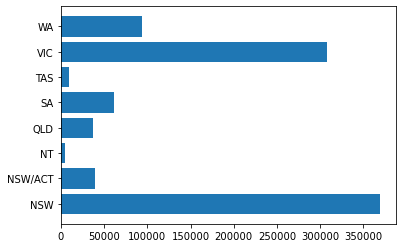

In [15]:
#Employment by capital cities
x = capital_city_employment1['Employment - Total']
index = capital_city_employment1['State/Territory']
plt.barh(index, x)#autopct='%1.1f%%')
plt.show()

###### In the above bar chart we can compare the number of people employed in capital cities of each state. In the above chart, we can see that NSW and VIC has the highest employed people, whereas NT has the lowest.

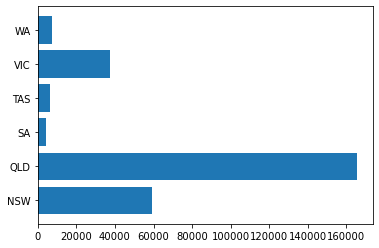

In [16]:
#Employment in regional areas
x = regional_area_employment1['Employment - Total']
y = regional_area_employment1['State/Territory']
plt.barh(y, x)
plt.show()

###### In this second chart, we can see the employment in regional areas we can see which states has the highest employment and which states has the lowest employment. In this chart, we can see that QLD has the highest number of jobs in regional areas, followed by NSW. SA has the lowest number of jobs.

<ipython-input-17-60401d2fa669>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Employment_Total_Capitals'] = Employment_Total_capitals


Text(0.5, 0, 'State/Territory')

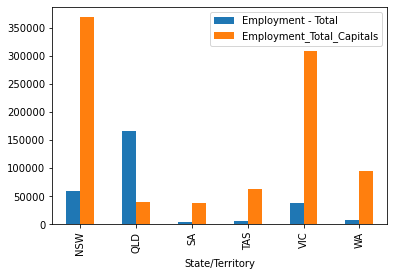

In [17]:
#Employment in capitals vs regional areas
df3 = regional_area_employment1[['State/Territory', 'Employment - Total']]
Employment_Total_capitals = capital_city_employment1['Employment - Total'].tolist()
Employment_Total_capitals.pop(5)
Employment_Total_capitals.pop(2)
Employment_Total_capitals
df3['Employment_Total_Capitals'] = Employment_Total_capitals
x= df3['State/Territory']
a = df3['Employment - Total']
b = df3['Employment_Total_Capitals']
df3 = df3.set_index("State/Territory")
df3[['Employment - Total','Employment_Total_Capitals']].plot(kind = "bar")
plt.xlabel("State/Territory")

###### But in this third chart we can see that the employemnt is very high in capital cities compared to the regional areas. This indicates that regional areas need to have more ICT based companies and in order to increase the number of jobs in tech industry in Australia, there should be a good increase of jobs in regional areas. 

In [20]:
employment_by_industry = employment_by_industry.reset_index(drop=False)

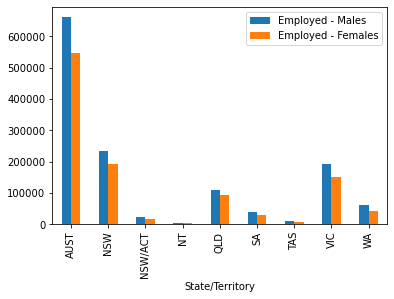

In [24]:
#Employement by Gender
employment_by_industry = employment_by_industry.groupby(['State/Territory']).sum()
a = employment_by_industry['Employed - Males']
b = employment_by_industry['Employed - Females']
employment_by_industry[['Employed - Males','Employed - Females']].plot(kind = "bar")

###### In the above chart we see the gender disparity of employment between men and women in tech industry. Even though this dataset, doesn't entirely focuses on ICT jobs, the disparity is high. In the ICT sector the difference is very high. Also, the enrolment of women in tech based courses is very low when compared to men.  